In [3]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

def load_files(dir_images):
    
    inputList = []
    
    inputNames = glob.glob(dir_images)
    
    for inputName in inputNames:
    
        inputFile = cv2.imread(inputName, 0)
        inputList.append(inputFile)

    return inputList


def load_landmarks():
    
    dir_landmarks = "_Data\Landmarks\original\*.txt"
    inputNames = glob.glob(dir_landmarks)
    
    inputList = np.empty([len(inputNames), 40, 2])
    
    for i, inputName in enumerate(inputNames):
    
        with open(inputName) as f:
            content = f.readlines()
            
        content = [float(x.strip()) for x in content] 
        
        inputList[i] = np.asarray(content).reshape(40,2)
        
    inputList = inputList.reshape(14,8, 40, 2)
        
    return inputList
    
def show(img):

    plt.imshow(img)
    plt.show()
    
######### Visualization #########
    
def show_tooth_points(landmark, show=True):
    
    plt.plot(landmark[:,0], landmark[:,1], 'ro')
    
    if show:
        plt.show()
        
def show_teeth_points(landmarks):
    
    plt.figure()
    n = len(landmarks)
    hn = int(n/2)
   
    print('Showing Teeth Landmarks')

    for i, landmark in enumerate(landmarks):
        plt.subplot(2, hn, i+1)
        plt.xticks(())
        plt.yticks(())   
        plt.plot(landmark[:,0], landmark[:,1], 'ro')
     
    plt.show()

Showing Teeth Landmarks


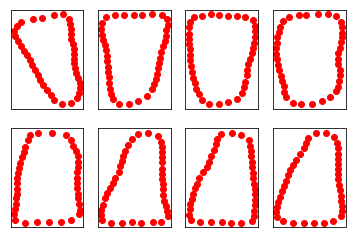

In [4]:
if __name__ == "__main__":
    #main

    dir_radiographs = "_Data\Radiographs\*.tif"
    radiographs = load_files(dir_radiographs)

    dir_segmentations = "_Data\Segmentations\*.png"
    segmentations = load_files(dir_segmentations)

    all_landmarks = load_landmarks()
    show_teeth_points(all_landmarks[0])